The Local Binary Pattern (LBP) operator describes the surroundings of a pixel by generating a bit-code
from the binary derivatives of a pixel. 

In [31]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [32]:
def convert_yuv(image):
    rgb_weights_ = [0.2126, 0.5870, 0.1140]
    image = np.array(Image.open('dataset/DatasetA/' + image))
    luma = image[...,:3] @ rgb_weights_
    return luma

In [33]:
def histogram_intersection(hist1, hist2):
    intersect = 0
    
    for i in range(len(hist1)):
        intersect += min(hist1[i],hist2[i])
    print("Intersection =========>", intersect)
    return intersect

In [34]:
def pixel_counter(img = None): 
    w,h = img.shape
    res = np.zeros((1,256))
    for i in range(w):
        for j in range(h):
            res[0,img[i,j]] = res[0,img[i,j]] + 1
    return res

A function that divides a greyscale image into equally sized non-overlapping windows and
returns the feature descriptor for each window as distribution of LBP codes. For each pixel in the
window, we compare the pixel to each of its 8 neighbours. Converedt the resulting bit-codes (base 2) to
decimals (base 10 numbers) and compute their histogram over the window. Normalize the histogram
(which is now a feature descriptor representing the window)

In [35]:
def window_breakdown():
    image = convert_yuv("face-1.jpg")
    w,h = image.shape
    block_size = 50
    h_block = block_size
    w_block = block_size
    window_num = int(np.ceil((w * h) / block_size ** 2))
    col = int(np.rint(w / block_size))
    row = int(np.rint(h / block_size))
    level = 0
    count = 0
    binary_matrix = np.ones((block_size,block_size,window_num), dtype=np.int16)
    final_hist = np.zeros((1,256,window_num))
    final_matrix = np.zeros((w, h), dtype= np.int16)
    bins = np.arange(0,256)
    bins = bins.reshape(256,1).ravel()
    for i in range(0, col):
        for j in range(0, row):
            c = i*block_size 
            r = j *block_size 
            c1 = i*block_size + block_size
            r1 = j*block_size + block_size
            block1 = image[c:c1, r:r1]
            for k in range(0, w_block-2):
                for l in range(0, h_block-2):
                    data = image_lbp(block1[k: k+3, l: l+3], [k, l])
                    binary_matrix[k,l,level] = data
                count +=1
            final_matrix[c:c1, r:r1] = binary_matrix[:, :, level]
            final_hist[:,:,level] = pixel_counter(binary_matrix[:, :, level])/(block_size*block_size)
            level+=1
        plt.axis('off')
        plt.imshow(block1,cmap='gray')
        plt.title('image')
        plt.show()
        plt.axis('off')
        plt.imshow(binary_matrix[:, :, level-1],cmap='gray')
        plt.title('lbp')
        plt.show()
        plt.axis('on')
        plt.plot(bins, final_hist[:,:,level-1].ravel())
        plt.title('hist')
        plt.show()
        final_hist[:,:,level]
    return level

In [36]:
# code for finding the LBP
def image_lbp(gray_image, test):
    if gray_image.shape[1] < 3:
        print(gray_image)
    imgLBP = np.zeros_like(gray_image)
    img  = gray_image
    center = img[1,1]
    img01 = (img >= center)*1.0
    img01_vector = img01.T.flatten()
    img01_vector = np.delete(img01_vector,4)
    where_img01_vector = np.where(img01_vector)[0]
    if len(where_img01_vector) >= 1:
        num = np.sum(2**where_img01_vector)
    else:
        num = 0
    return num

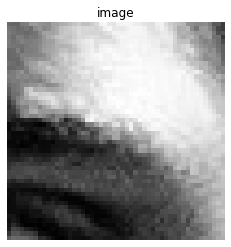

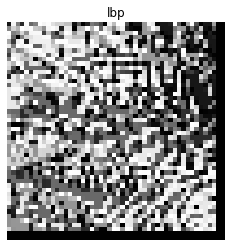

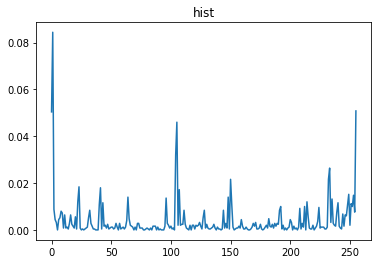

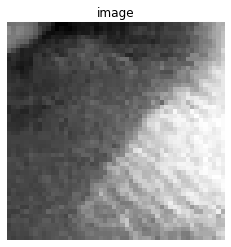

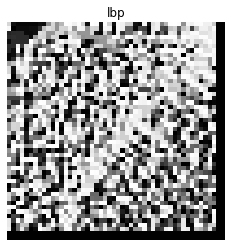

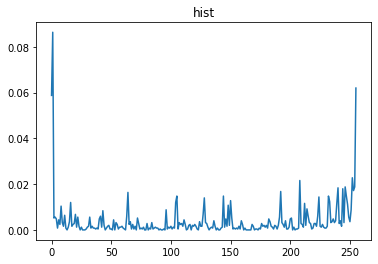

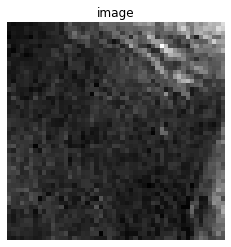

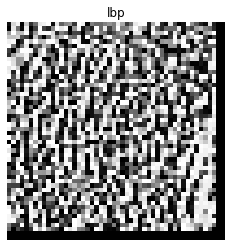

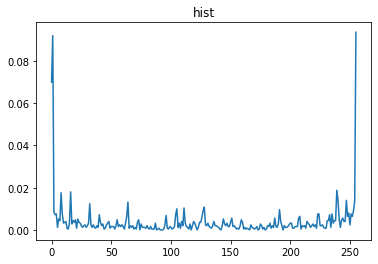

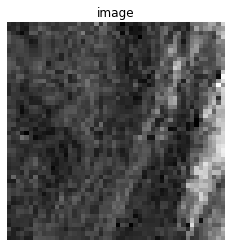

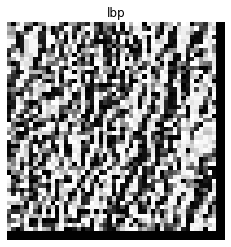

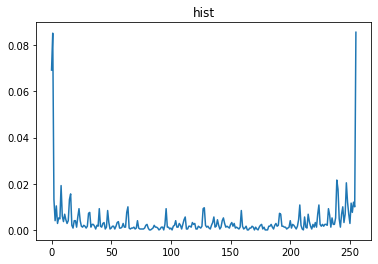

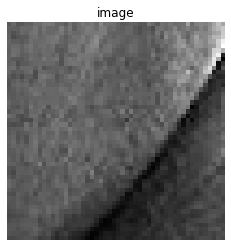

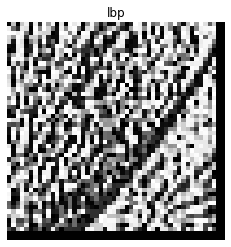

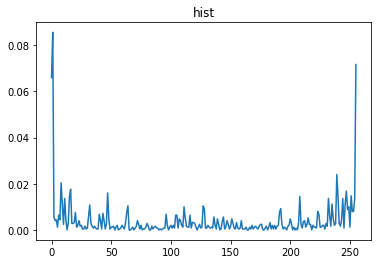

In [37]:
image = window_breakdown()

In [38]:
def window_breakdown_update(image, plot=False):
    image = convert_yuv(image)
    w,h = image.shape
    block_size = 16
    h_block = block_size
    w_block = block_size
    window_num = int(np.ceil((w * h) / block_size ** 2))
    col = int(np.rint(w / block_size))
    row = int(np.rint(h / block_size))
    level = 0
    count = 0
    binary_matrix = np.ones((block_size,block_size,window_num), dtype=np.int16)
    final_hist = np.zeros((1,256,window_num))
    final_matrix = np.zeros((w, h), dtype= np.int16)
    for i in range(0, col):
        for j in range(0, row):
            c = i*block_size 
            r = j *block_size 
            c1 = i*block_size + block_size
            r1 = j*block_size + block_size
            block1 = image[c:c1, r:r1]
            for k in range(0, w_block-2):
                for l in range(0, h_block-2):
                    data = image_lbp(block1[k: k+3, l: l+3], [k, l])
                    binary_matrix[k,l,level] = data
                count +=1
            final_matrix[c:c1, r:r1] = binary_matrix[:, :, level]
            final_hist[:,:,level] = pixel_counter(binary_matrix[:, :, level])/(block_size*block_size)
            level +=1
    if plot:
        plt.axis('off')
        plt.imshow(final_matrix,cmap='gray')
        plt.title('image')
        plt.show()
    return final_hist.ravel(), window_num

In [39]:
def identify(intersection1, intersection2, windows):
    intersection1 = intersection1/windows
    intersection2 = intersection2/windows
    print("Normalized intersection1---->", intersection1)
    print("Normalized intersection2---->", intersection2)
    if intersection1 > intersection2:
        print("its a Car")
    else:
        print("its a Face")

In [40]:
car_1, window_num = window_breakdown_update('car-1.jpg')
car_2, window_num = window_breakdown_update('car-2.jpg')
face_1, window_num = window_breakdown_update('face-1.jpg')
face_2, window_num = window_breakdown_update('face-2.jpg')

In [41]:
car_1, window_num = window_breakdown_update('car-1.jpg')
car_2, window_num = window_breakdown_update('car-2.jpg')
face_1, window_num = window_breakdown_update('face-1.jpg')
face_2, window_num = window_breakdown_update('face-2.jpg')
face_3, window_num = window_breakdown_update('face-3.jpg')

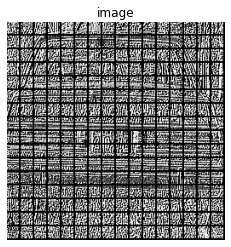

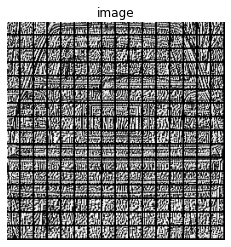

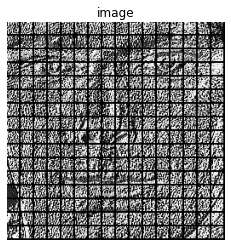

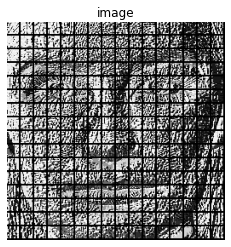

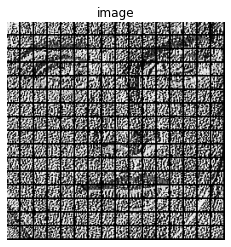

In [42]:
car_1, window_num = window_breakdown_update('car-1.jpg', plot=True)
car_2, window_num = window_breakdown_update('car-2.jpg', plot=True)
face_1, window_num = window_breakdown_update('face-1.jpg', plot = True)
face_2, window_num = window_breakdown_update('face-2.jpg', plot=True)
face_3, window_num = window_breakdown_update('face-3.jpg', plot=True)

<b>Histogram descriptor</b>

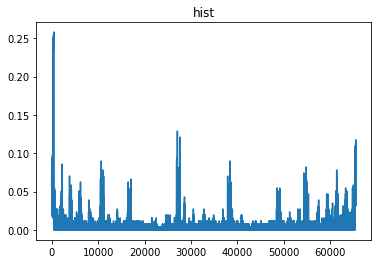

In [43]:
bins = np.arange(0,len(car_1))
bins = bins.reshape(len(car_1),1).ravel()
plt.plot(bins, car_1)
plt.title('hist')
plt.show()

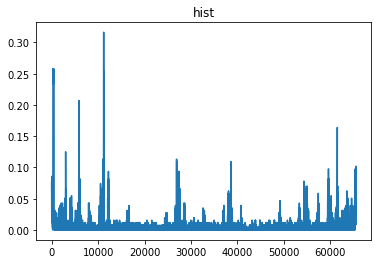

In [44]:
bins = np.arange(0,len(face_1))
bins = bins.reshape(len(face_1),1).ravel()
plt.plot(bins, face_1)
plt.title('hist')
plt.show()

A descriptor that represents the whole image as consisting of multiple windows. For
example, you could combine several local descriptions into a global description by concatenation.
The classification process separates the images in the dataset into two categories: face images and
non-face images (for example, you could use histogram similarities)

In [45]:
car_inter = histogram_intersection(car_1, face_3)
face_inter = histogram_intersection(face_2, face_3)
identify(car_inter, face_inter, window_num)

Intersection =========> 145.4296875
Intersection =========> 144.6015625
Normalized intersection1----> 0.568084716796875
Normalized intersection2----> 0.564849853515625
its a Car
